# The Case

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile (SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off from SCL during 2017.<br>
<br>
The following information is available for each flight:
>Fecha-I: Scheduled date and time of the flight<br>
>Vlo-I : Scheduled flight number<br>
>Ori-I : Programmed origin city code<br>
>Des-I : Programmed destination city code<br>
>Emp-I : Scheduled flight airline code<br>
>Fecha-O : Date and time of flight operation<br>
>Vlo-O : Flight operation number of the flight<br>
>Ori-O : Operation origin city code<br>
>Des-O : Operation destination city code<br>
>Emp-O : Airline code of the operated flight<br>
>DIA: Day of the month of flight operation<br>
>MES : Number of the month of operation of the flight<br>
>AÑO : Year of flight operation<br>
>DIANOM : Day of the week of flight operation<br>
>TIPOVUELO : Type of flight, I =International, N =National<br>
>OPERA : Name of the airline that operates<br>
>SIGLAORI: Name city of origin<br>
>SIGLADES: Destination city name<br>

### Tools

In [1]:
!pip install imblearn --user

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
#import datetime
#from math import sin, cos, sqrt, atan2, radians
from math import sqrt
import seaborn as sns
from matplotlib import pyplot as plt #, dates

#from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier #, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import r2_score,confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV
from sklearn import tree

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import chi2

In [4]:
smote = SMOTE()

## Initial Analysis

How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

### Initial analysis over the dataframe data

In [5]:
#Reading the dataset and inputing in 'df_flights' variable
#Viewing the top 5 rows to observe the columns and to make an initial analysis of data

df_flights = pd.read_csv('dataset_SCL.csv', sep=',', low_memory=False)
df_flights.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [6]:
#Verify the variables type and if there's any null information in df_flights

df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [7]:
#Printing a better way to see null occurrences
#There's one occurrence at 'Vlo-O' variable

df_flights.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [8]:
#Looking the data in the row where 'Vlo-O' is null
#There's nothing anymore

df_flights[df_flights['Vlo-O'] == np.nan]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [9]:
#Dropping the row where there's null data

df_flights = df_flights.dropna()

In [10]:
#Verify if there's still any null information in df_flights
#Now, we have no null case

df_flights.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Observing unique occurrences of values in each column.

We have:
- 64 Des-I and 63 Des-O
- 62 SIGLADES
- 2 AÑO


In [11]:
#Printing unique occurrences of values in each column.

df_flights.nunique()

Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

Looking to 'SIGLADES', there're less cities than 'Des' (airport). \
Probably because one city can have more than one airport.

In [12]:
#Taking a look to unique SIGLADES registers and how many they are

print(df_flights['SIGLADES'].unique())
print(df_flights['SIGLADES'].nunique())

['Miami' 'Dallas' 'Buenos Aires' 'Toronto' 'Paris' 'Ciudad de Mexico'
 'Bogota' 'Roma' 'Londres' 'Ciudad de Panama' 'Atlanta' 'Sao Paulo'
 'Rio de Janeiro' 'Florianapolis' 'Madrid' 'Lima' 'Sydney' 'Houston'
 'Asuncion' 'Cataratas Iguacu' 'Puerto Montt' 'Punta Arenas'
 'Puerto Natales' 'Balmaceda' 'Temuco' 'Valdivia' 'Concepcion' 'La Serena'
 'Copiapo' 'Calama' 'Antofagasta' 'Iquique' 'Arica' 'Mendoza' 'Cordoba'
 'Montevideo' 'Castro (Chiloe)' 'Osorno' 'Orlando' 'Nueva York'
 'Guayaquil' 'Cancun' 'Punta Cana' 'Los Angeles' 'Auckland N.Z.'
 'Isla de Pascua' 'La Paz' 'Santa Cruz' 'Curitiba, Bra.' 'Quito'
 'Bariloche' 'Rosario' 'Washington' 'Tucuman' 'Melbourne' 'San Juan, Arg.'
 'Neuquen' 'Pisco, Peru' 'Ushuia' 'Puerto Stanley' 'Punta del Este'
 'Cochabamba']
62


There's one more Des-I than Des-O: it's SARI. \
Maybe SARI isn't at operational Destination list, because the line between SARI and SCL was deactivated.


In [13]:
#Looking to unique 'Des-I' registers and how many they are

print(df_flights['Des-I'].unique())
print(df_flights['Des-I'].nunique())

['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCVD' 'SCQP' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'SANT' 'YMML' 'SEQU' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB' 'SARI']
64


In [14]:
#Looking to unique 'Des-O' registers and how many they are

print(df_flights['Des-O'].unique())
print(df_flights['Des-O'].nunique())

['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCQP' 'SCVD' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'KIAD' 'SANT' 'YMML' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB']
63


There're two operational years on the dataset: 2017 and 2018. \
That's because some flights was programmed to occur in the last day of 2017, but occurred on 2018 because of some delay.

In [15]:
#Checking uniques values in 'AÑO'

df_flights['AÑO'].unique()

array([2017, 2018], dtype=int64)

In [16]:
#Looking to registers where 'AÑO' is 2018 to analysis what could occured

df_flights[df_flights['AÑO'] == 2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


### Analysis about frequency and relative frequency of different variables

Looking at the distribuition of flights occurence over days of the week, we can observe that the most prefered day to travel are: Monday, Thursday and Friday. Probably, they're the favourite days to travel and enjoy the weekends and go back after.And maybe that's because the least favorite day to flight is Saturday. <br>
In the Plotting, we can see a "valley" on Saturday flights occurrence.

In [17]:
#Flights Occurence and Percent by day of the week

freq_day_week = df_flights['DIANOM'].value_counts()
percent_day_week = df_flights['DIANOM'].value_counts(normalize=True) * 100

df_flights_day_week = pd.DataFrame(
    {
        'Frequency':freq_day_week, 'Percent':percent_day_week
    }).reset_index().rename(columns={'index':'Day of Week'})

df_flights_day_week.sort_values('Frequency', ascending=False)

,Day of Week,Frequency,Percent
0,Viernes,10292,15.089803
1,Jueves,10250,15.028224
2,Lunes,10131,14.853750
3,Domingo,9796,14.362583
4,Miercoles,9722,14.254087
5,Martes,9662,14.166117
6,Sabado,8352,12.245437


<AxesSubplot:xlabel='DIANOM', ylabel='count'>

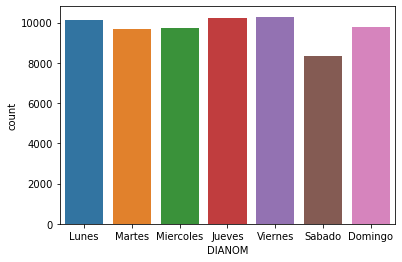

In [18]:
#Plotting a visualization to observe the flight levels across the week

sns.countplot(data=df_flights, x = 'DIANOM', order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])

Talking about months of the year, we can see that December, January and November are the top 3 Months to flight. Probably because of Special Holidays or Vacations. In the Plotting, we can observe a visualy similar behavior on July and October.

In [19]:
#Flights Occurence and Percent by month of the year

freq_mes = df_flights['MES'].value_counts()
percent_mes = df_flights['MES'].value_counts(normalize=True) * 100

df_flights_month = pd.DataFrame(
    {
        'Frequency':freq_mes, 'Percent':percent_mes
    }).reset_index().rename(columns={'index':'Month'})

df_flights_month.sort_values('Frequency', ascending=False)

,Month,Frequency,Percent
0,12,6356,9.318965
1,1,6107,8.953889
2,11,6080,8.914302
3,10,6032,8.843926
4,7,5992,8.785280
5,8,5744,8.421670
6,9,5610,8.225203
7,2,5561,8.153361
8,3,5482,8.037534
9,5,5240,7.682721


<AxesSubplot:xlabel='MES', ylabel='count'>

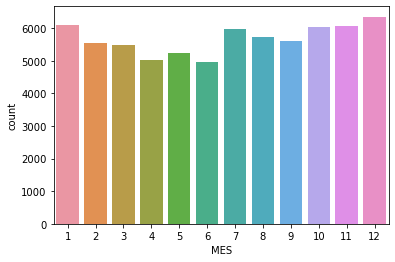

In [20]:
#Plotting a visualization to observe the occurrences across the year

sns.countplot(data=df_flights, x = 'MES')#, palette='ch:.25')

About the type of flight, we can observe that most of them are National Flights (54.2 %).


In [21]:
#Flights Occurence and Percent by type of flights

freq_type_flight = df_flights['TIPOVUELO'].value_counts()
percent_type_flight = df_flights['TIPOVUELO'].value_counts(normalize=True) * 100

df_flights_type_flight = pd.DataFrame(
    {
        'Frequency':freq_type_flight, 'Percent':percent_type_flight
    }).reset_index().rename(columns={'index':'Flight'})

df_flights_type_flight.sort_values('Frequency', ascending=False)

,Flight,Frequency,Percent
0,N,36966,54.198373
1,I,31239,45.801627


<AxesSubplot:xlabel='TIPOVUELO', ylabel='count'>

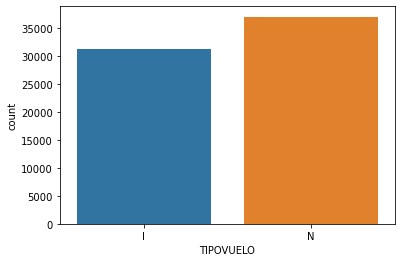

In [22]:
#Plotting a visualization to observe the difference better

sns.countplot(data=df_flights, x = 'TIPOVUELO')

Looking at the average of flight occurencer in each Type of Flight across the months, we can see that the predominance of national flights is over the year. Visually, at the plot, the discrepancy is higher in October, November and December.

In [23]:
#Calculating average occurence of each type of flights across each month of the year

mean_data1 = df_flights.pivot_table(values='Fecha-I',index='MES',columns='TIPOVUELO', aggfunc=len)
mean_data1 = mean_data1.reset_index()

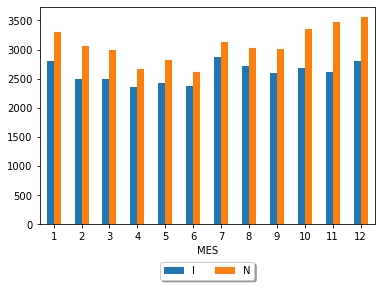

In [24]:
#Plotting a visualization of the calculated average across month

ax2 = mean_data1.plot(x='MES', y=['I','N'], kind='bar',rot=0)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=5)

Even the predominance of National Flights, the top 1 destination is Buenos Aires - Argentina. But, observing the top 5 flight destinations, we can see that 3 are chilean: Antofagasta, Calama and Puerto Montt.

In [25]:
#Selecting the top 5 Flights Occurence and Percent by City Destination

fred_dest_city = df_flights['SIGLADES'].value_counts()
percent_dest_city = df_flights['SIGLADES'].value_counts(normalize=True)*100

df_flights_city = pd.DataFrame(
{
    'Frequency':fred_dest_city, 'Percent':percent_dest_city
}).reset_index().rename(columns={'index':'City'})

df_flights_city.sort_values('Percent', ascending=False).head(5)

,City,Frequency,Percent
0,Buenos Aires,6335,9.288175
1,Antofagasta,5786,8.483249
2,Lima,5269,7.725240
3,Calama,5146,7.544901
4,Puerto Montt,4357,6.388095


## Feature Engineering

Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:<br></li>
        <ol>
            <li>high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise</li>
            <li>min_diff : difference in minutes between Date-O and Date-I</li>
            <li>delay_15 : 1 if min_diff > 15, 0 if not</li>
            <li>period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I</li>
        </ol>


In [26]:
#Fecha-I and Fecha-O are object type. 
#This code is to convert them to datetime, allowing to make data manipulations.

df_flights['Fecha-I'] = pd.to_datetime(df_flights['Fecha-I'], errors='coerce')
df_flights['Fecha-O'] = pd.to_datetime(df_flights['Fecha-O'], errors='coerce')

### high_season

In [27]:
#Function to categorize if a period is high season (1) or not (0).
#Built regardless of the year.

def high_season(date):
    #Dec-15 and Mar-3 was split in three parts
    #Dates between Dec-15 and Dec-31, in other words after Dec-15 
    if date.month == 12 and date.day >= 15:
        return 1
    #Dates that are in January or February
    elif date.month == 1 or date.month == 2:
        return 1
    #Dates before Mar-3 
    elif date.month == 3 and date.day <= 3:
        return 1
    #Between Jul-15 and Jul-31 is, in other words, after Jul-15
    elif date.month == 7 and date.day >= 15:
        return 1
    #Between Sep-11 and Sep-30, in other words, after Jul-15
    elif date.month == 9 and date.day >= 11:
        return 1
    #Otherwise, it isn't high season
    else:
        return 0

In [28]:
#Apply the function 'high_season' to each row in 'df_flights', based on 'Fecha-I'

df_flights['high_season'] = df_flights.apply(lambda x : high_season(x['Fecha-I']), axis=1)
df_flights.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1


### min_diff

In [29]:
#Calculating the difference in hours of 'Fecha-O' and 'Fecha-I'

df_flights['min_diff'] = (df_flights['Fecha-O'] - df_flights['Fecha-I']).dt.total_seconds()/60
df_flights.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,-5.0
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,-5.0
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami,1,40.0
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,69.0


### delay_15

In [30]:
#Based on 'min_diff', flags 1 if it's higher than 15 minutes and 0 if it's lower

df_flights['delay_15'] = df_flights.apply(lambda x: 1 if x['min_diff'] > 15 else 0, axis=1)
df_flights.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,34.0,1
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,...,1,2017,Sabado,I,American Airlines,Santiago,Miami,1,-5.0,0
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,-5.0,0
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,40.0,1
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,69.0,1


In [31]:
#Checking the 'delay_15' occurrence
#Almost 20% are delayed flights

df_flights['delay_15'].value_counts()

0    55591
1    12614
Name: delay_15, dtype: int64

### period_day

In [32]:
#Function to categorize if a time is in the morning, afternoon or night

def period_day(dtime):
    #Between 5:00 and 11:59 - morning
    if dtime.hour >= 5 and dtime.hour < 12:
        return 'morning'
    #Between 12:00 and 18:59 - afternoon
    elif dtime.hour >= 12 and dtime.hour < 19:
        return 'afternoon'
    #Otherwise, between 19:00 and 4:59 - night
    else:
        return 'night'

In [33]:
#Apply the function 'period_day' to each row in 'df_flights', based on 'Fecha-I'

df_flights['period_day'] = df_flights.apply(lambda x: period_day(x['Fecha-I']), axis=1)
df_flights

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,afternoon
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,afternoon
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,afternoon
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,afternoon


### Exporting csv

In [34]:
#Creating a dataframe with created features and exporting to csv

synthetic_features = df_flights[['high_season','min_diff','delay_15','period_day']]
synthetic_features

synthetic_features.to_csv('synthetic_features.csv')

## Delay Rate behavior

What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight<br>
What variables would you expect to have the most influence in predicting delays?

In [35]:
#Function to calculate the Delay Rate with differents parameters

def delay_rate (col_param):
    delay_count = df_flights[df_flights['delay_15'] == 1][col_param].value_counts().reset_index().rename(columns={'index':col_param,col_param:'delay_15_true'})
    total_count = df_flights[[col_param,'delay_15']].groupby(by=col_param).agg('count').reset_index()
    
    delay_rate = pd.merge(delay_count, total_count, on=col_param)
    delay_rate['percent'] = delay_rate['delay_15_true']/delay_rate['delay_15']
    
    return delay_rate

In [36]:
#Function to plot two bar charts, side by side, across differents parameters
#On the right, a Delay Occurrence visualization
#On the left, a Delay Rate visualization

def plot_result(col_param, var_result, var_title):
    fig, axes = plt.subplots(1,2, figsize = (16,8), sharex='col')
    ax1 = var_result.plot(ax = axes[0], x = col_param, y = 'delay_15_true', kind='bar', label="Delay")
    ax2 = var_result.plot(ax = axes[1], x = col_param, y = 'percent', kind='bar',label="Delay")
    
    ax1.title.set_text('Occurence of Delay across ' + var_title)
    ax2.title.set_text('Delay Rate across ' + var_title)
    
    ax1.set_ylabel('Occurence of Delay')
    ax2.set_ylabel('Delay Rate')
    
    ax1.set_xlabel(var_title)
    ax2.set_xlabel(var_title)
    
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    
    ax1.legend().set_visible(False)
    ax2.legend().set_visible(False)

### Destination

Behaviour: there's no possible to visualy observe a strong correlation between Delay Rate, Delay Occurence and Destination.

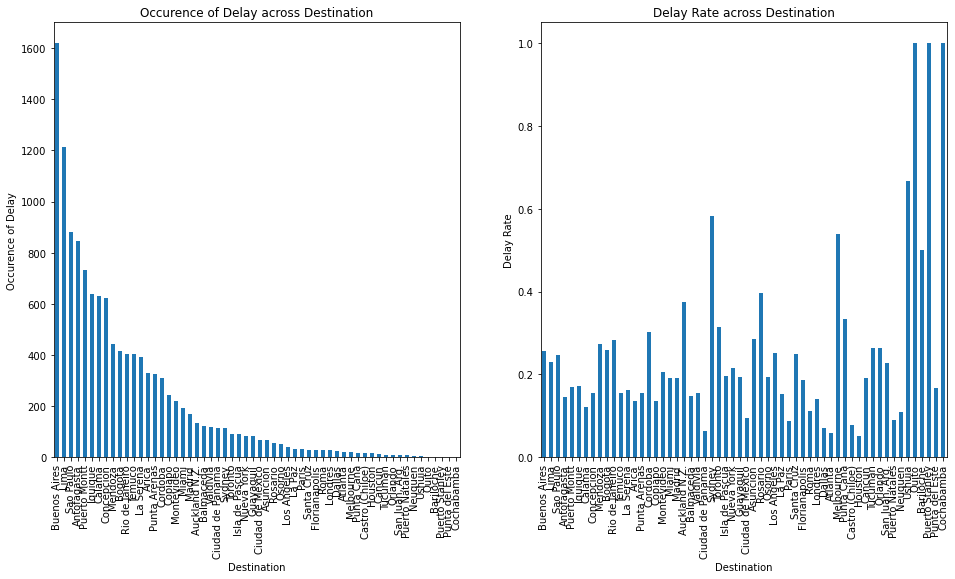

In [37]:
result_dest = delay_rate('SIGLADES')
plot_result('SIGLADES', result_dest, 'Destination')

### Airline

Behaviour: there's no possible to visualy observe a strong correlation between Delay Rate, Delay Occurence and Airline.

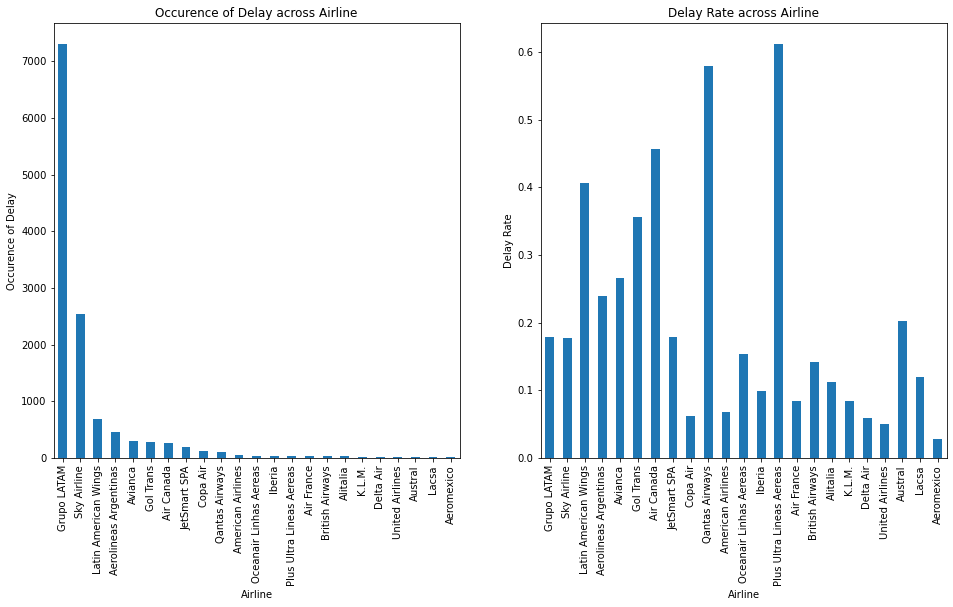

In [38]:
result_airline = delay_rate('OPERA')
plot_result('OPERA', result_airline, 'Airline')

### Month of the year

Behaviour: in general, months with more Delay Occurences have higher Delay Rate. <br>(Month of the year and Delay Rate are directly proportional)

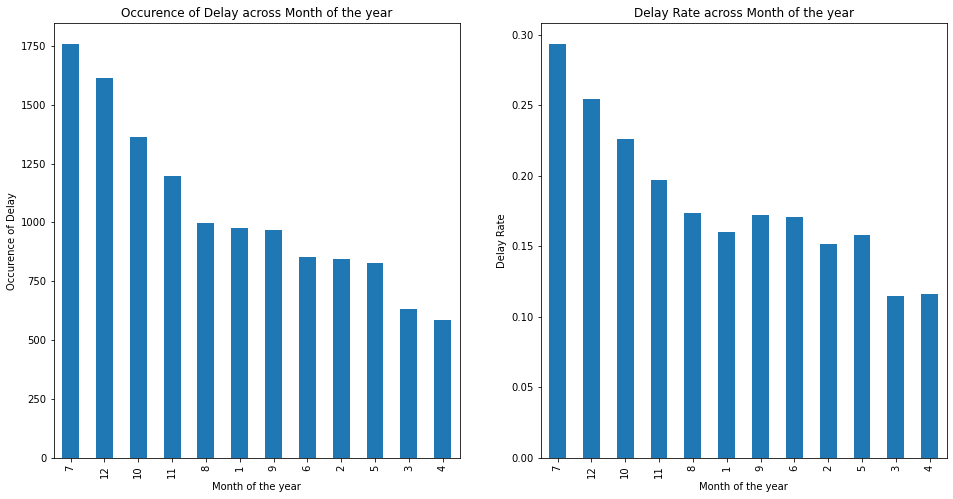

In [39]:
result_month = delay_rate('MES')
plot_result('MES', result_month, 'Month of the year')

### Day of the week

Behaviour: in general, days of the week with more Delay Occurences have higher Delay Rate.<br>
(Day of the week and Delay Rate are directly proportional)

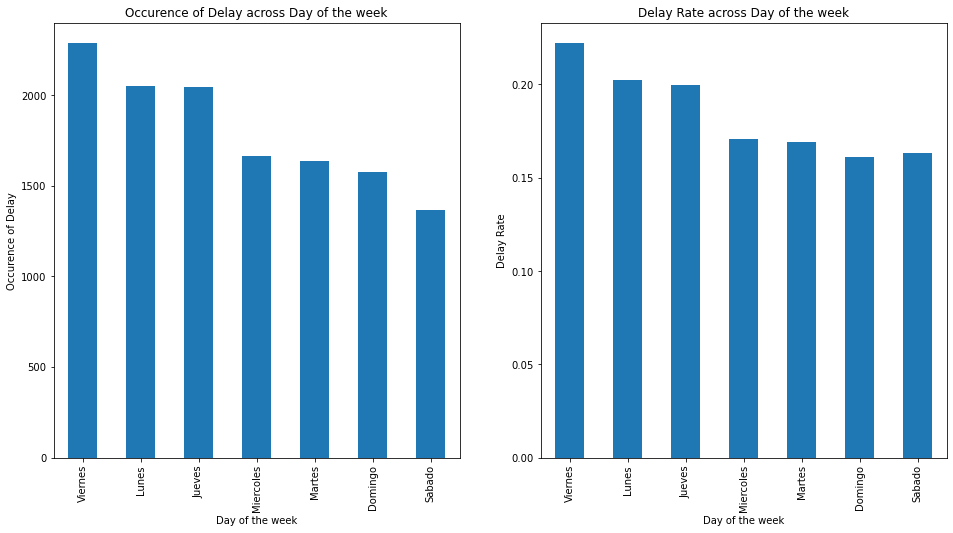

In [40]:
result_dweek = delay_rate('DIANOM')
plot_result('DIANOM', result_dweek, 'Day of the week')

### Season

Behaviour: although Low Season has more Delay Occurences, there's a higher Delay Rate on High Season.<br>
(Season and Delay Rate are inversely proportional)

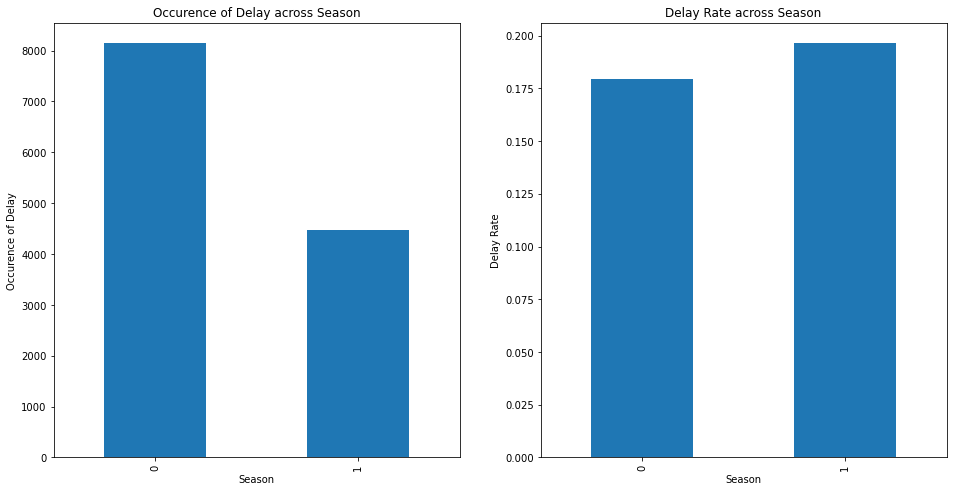

In [41]:
result_season = delay_rate('high_season')
plot_result('high_season', result_season, 'Season')

### Type of flight

Behaviour: International flights have more Delay Occurence and higher Delay Ratem although National flights have less Delay Occurence and lower Delay Rate. <br> 
(Type of flight and Delay Rate are directly proportional)

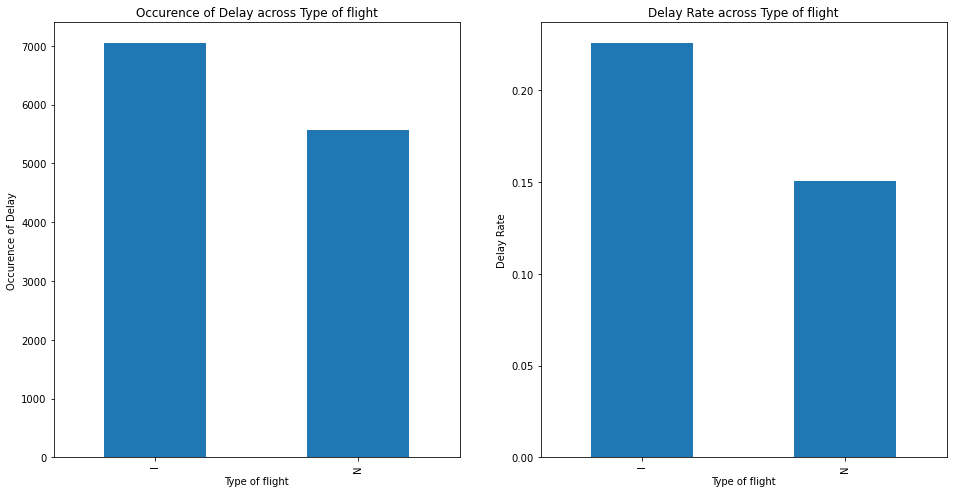

In [42]:
result_tflight = delay_rate('TIPOVUELO')
plot_result('TIPOVUELO', result_tflight, 'Type of flight')

### Variables to expect to have the most influence in predicting

Of the listed variables in this section, I expect that Month of the year, Day of the week, Season and  Flight type to have the most influence in the predictin delays. That's because of the proportional/correlation behaviour.

## Training and Testing models

Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay. <br>
Feel free to generate additional variables and/or supplement with external variables.

In [43]:
#Setting X and y variables
#It's temporary, because it's necessary to evaluate if they need to be treated

#Setting dependents features
X_temp = df_flights[['OPERA','SIGLADES','TIPOVUELO','DIANOM','MES','high_season','period_day']]

#Setting the target 
y_temp = df_flights['delay_15']

In [44]:
#Checking the features type

X_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OPERA        68205 non-null  object
 1   SIGLADES     68205 non-null  object
 2   TIPOVUELO    68205 non-null  object
 3   DIANOM       68205 non-null  object
 4   MES          68205 non-null  int64 
 5   high_season  68205 non-null  int64 
 6   period_day   68205 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.2+ MB


In [45]:
#'OPERA','SIGLADES','TIPOVUELO','DIANOM','period_day' are object type, so it's necessary to treat
#them before fitting process

#For that, it's necessary to "transform" each of them from categorical to flag columns with 0 or 1 registers

X_temp = pd.get_dummies(X_temp, columns = ['OPERA','SIGLADES','TIPOVUELO','DIANOM','period_day'])

In [46]:
#Printing the new X_temp
#Now, there're 99 columns

X_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   MES                             68205 non-null  int64
 1   high_season                     68205 non-null  int64
 2   OPERA_Aerolineas Argentinas     68205 non-null  uint8
 3   OPERA_Aeromexico                68205 non-null  uint8
 4   OPERA_Air Canada                68205 non-null  uint8
 5   OPERA_Air France                68205 non-null  uint8
 6   OPERA_Alitalia                  68205 non-null  uint8
 7   OPERA_American Airlines         68205 non-null  uint8
 8   OPERA_Austral                   68205 non-null  uint8
 9   OPERA_Avianca                   68205 non-null  uint8
 10  OPERA_British Airways           68205 non-null  uint8
 11  OPERA_Copa Air                  68205 non-null  uint8
 12  OPERA_Delta Air                 68205 non-null  uint8
 13  O

In [47]:
#Because of the large amount of features, were selected the most relevants to the model
#For that, chi-squared was calculated

#When we have a higher chi-squared(and low p-value), that means that we have a statitical evidence
#to deduce that the expected and the observed variables aren't the same and they're dependents
#Higher chi-squared rate means higher dependency

#Calculating Chi-Squared metric
chi_scores = chi2(X_temp,y_temp)

#Selecting the 20% most dependents variables and plotting a view
scores = pd.Series(chi_scores[0], index=X_temp.columns)
pvalues = pd.Series(chi_scores[1], index=X_temp.columns)
df_chi2_test = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})
df_chi2_score = df_chi2_test.sort_values('Chi2', ascending=False).head(20)
df_chi2_score

,Chi2,p-Value
MES,889.349785,2.027985e-195
OPERA_Latin American Wings,547.532864,4.332061e-121
TIPOVUELO_I,342.833992,1.540583e-76
TIPOVUELO_N,289.720042,5.722117e-65
OPERA_Air Canada,276.685209,3.962430e-62
SIGLADES_Buenos Aires,210.542357,1.046019e-47
SIGLADES_Sydney,203.385757,3.810782e-46
OPERA_Qantas Airways,201.373450,1.047416e-45
SIGLADES_Ciudad de Panama,183.388353,8.823536e-42
OPERA_Copa Air,183.388353,8.823536e-42


Note: we can see that the 'MES' and 'TIPOVUELO' are in the top 5 in the relevant variables list, as expected before.

In [48]:
#Defining X dataframe with relevant features to train and test models
df_chi2_params = df_chi2_score.index
X = X_temp[df_chi2_params]

#Setting y - target feature
y = y_temp

#Creating a list with differents proportions to input in cross-validation test
test_size_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [49]:
#Function to calculate metrics to evaluate models
#Execute Cross-validation

#Cross-validation score: Array of kfolds tests Accuracy
#Cross-validation score mean: Accuracy of the cross-validation score average
#Cross-validation RMSE: Root Mean Squared Error, the average error of the deviations, giving greater weight to larger erros


def model_training(model, X, y, bool_print = True):
    model = model.fit(X, y)
    
    kfold = KFold(n_splits=10)
    cv_score = cross_val_score(model, X, y, cv=kfold)
    rmse_cv = np.sqrt(-cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error'))
    
    if bool_print:
        print('• Cross-validation score: ', cv_score)
        print('• Cross-validation score mean: ', cv_score.mean())
        print('• Cross-validation RMSE: ', rmse_cv.mean())
        
        
    return cv_score, cv_score.mean(), rmse_cv.mean()

In [50]:
#Function to generate X and y values, both training ans testing

def test_size_set(test_size_item):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_item, random_state=7)
    
    return X_train, X_test, y_train, y_test

In [51]:
#Function to generate a dataframe with values of model evaluation metrics

def proportion_test(model, proportion_test_list):
    arr_results = []
    for i in proportion_test_list:
        X_train, X_test, y_train, y_test = test_size_set(i)
        cv_score, cv_score_mean, rmse_mean, \
            = model_training(model, X_train, y_train, False)
        arr_results.append([i, cv_score, cv_score_mean, rmse_mean])
    
    return (pd.DataFrame(arr_results, columns=['test_size', 'cv_score', 'cv_score_mean', 'rmse_mean']))

In [52]:
#Function to test an array of parameters in a model
#Use differents values of test-train sizes
#It plots the best score with the best estimator to each test-train size

def param_test(model, proportion_test_list, model_param):
    arr_results = []
    for i in proportion_test_list:
        randm_src = RandomizedSearchCV(model, param_distributions = model_param, cv = 10)
        
        X_train, X_test, y_train, y_test = test_size_set(i) 
        randm_src.fit(X_train, y_train)
        
        best_estimator = randm_src.best_estimator_
        best_score = randm_src.best_score_
        arr_results.append([i,best_score,best_estimator])
        
    return (pd.DataFrame(arr_results, columns=['size', 'best_score','best_estimator']))

### Decision Tree Classifier

In [53]:
#Defining the array of parameters to test the fit in the Decision Tree Classifier

parameters_dtc = {'criterion' : ['gini', 'entropy']
              , 'splitter' : ['best','random']
              , 'max_depth' : [3,5,7,9,10]
              , 'min_samples_split' : [2, 4, 6]
              , 'max_features' : ['auto', 'sqrt', 'log2']
             }

In [54]:
#Executing the paratemers fitting test in the Decision Tree Classifier model

param_test_dtc = param_test(tree.DecisionTreeClassifier(),test_size_list,parameters_dtc)
param_test_dtc

,size,best_score,best_estimator
0,0.1,0.817053,"DecisionTreeClassifier(max_depth=10, max_featu..."
1,0.2,0.817847,"DecisionTreeClassifier(criterion='entropy', ma..."
2,0.3,0.817544,"DecisionTreeClassifier(criterion='entropy', ma..."
3,0.4,0.817951,"DecisionTreeClassifier(max_depth=10, max_featu..."
4,0.5,0.818456,"DecisionTreeClassifier(criterion='entropy', ma..."
5,0.6,0.819735,"DecisionTreeClassifier(criterion='entropy', ma..."
6,0.7,0.819510,"DecisionTreeClassifier(max_depth=10, max_featu..."
7,0.8,0.818268,"DecisionTreeClassifier(criterion='entropy', ma..."
8,0.9,0.819941,"DecisionTreeClassifier(criterion='entropy', ma..."


In [55]:
#Getting the estimator with the best score to use in the model test

choosed_param_dtc = param_test_dtc.loc[param_test_dtc.best_score.idxmax()]['best_estimator']
choosed_param_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2')

In [56]:
#Testing the Decision Tree Classifier model
#Using the best estimators got in the parameters test in the model test

df_results_dtc = proportion_test(choosed_param_dtc, test_size_list)
df_results_dtc

,test_size,cv_score,cv_score_mean,rmse_mean
0,0.1,"[0.8154422544388337, 0.8143020035836456, 0.816...",0.816548,0.428973
1,0.2,"[0.8171156312992487, 0.8187648891332234, 0.809...",0.816527,0.426826
2,0.3,"[0.8131937172774869, 0.8094240837696335, 0.817...",0.816518,0.429906
3,0.4,"[0.8050329831419497, 0.8194478377718055, 0.811...",0.816998,0.427586
4,0.5,"[0.8088537085898564, 0.8120785693345061, 0.822...",0.817049,0.428248
5,0.6,"[0.8142176621473067, 0.8277757420300477, 0.820...",0.818122,0.425091
6,0.7,"[0.815828041035662, 0.8225806451612904, 0.8025...",0.816334,0.427167
7,0.8,"[0.819047619047619, 0.8057184750733137, 0.8291...",0.818268,0.427261
8,0.9,"[0.8313782991202346, 0.8093841642228738, 0.813...",0.816862,0.428230


In [57]:
#Getting the average of Cross Validation Average Score to evaluate the Decision Tree Classifier model's performance

cvsm_dtc = df_results_dtc['cv_score_mean'].mean()
cvsm_dtc

0.8170252045115908

### Gaussian Naive Bayes

In [58]:
#Testing the Gaussian Naive Bayes model

df_results_gb = proportion_test(GaussianNB(), test_size_list)
df_results_gb

,test_size,cv_score,cv_score_mean,rmse_mean
0,0.1,"[0.7827007655970027, 0.7704837921485584, 0.781...",0.778574,0.470534
1,0.2,"[0.7692871541139821, 0.7802822063404801, 0.780...",0.778096,0.471040
2,0.3,"[0.7798952879581151, 0.7798952879581151, 0.780...",0.778899,0.470185
3,0.4,"[0.7759589543122404, 0.7749816760322502, 0.774...",0.778413,0.470709
4,0.5,"[0.772793902081501, 0.7707417179712694, 0.7876...",0.778547,0.470535
5,0.6,"[0.7871015023818249, 0.7827042872847196, 0.780...",0.780221,0.468775
6,0.7,"[0.7830972154372252, 0.7913000977517106, 0.779...",0.779189,0.469814
7,0.8,"[0.7897435897435897, 0.7844574780058651, 0.804...",0.780514,0.468312
8,0.9,"[0.7888563049853372, 0.7419354838709677, 0.766...",0.773460,0.475636


In [59]:
#Getting the average of Cross Validation Average Score to evaluate the Gaussian Naive Bayes model's performance

cvsm_gb = df_results_gb['cv_score_mean'].mean()
cvsm_gb

0.778434954175341

### Random Forest Classifier

In [60]:
#Defining the array of parameters to test the fit in the Random Forest Classifier

parameters_rfc = {'bootstrap': [True, False]
                  , 'max_depth': [3,5,7,9,10]
                  , 'max_features': ['auto', 'sqrt']
                  , 'min_samples_leaf': [1, 2]
                  , 'min_samples_split': [2, 4, 6]
                  , 'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80]}

In [61]:
#Executing the paratemers fitting test in the Random Forest Classifier model

param_test_rfc = param_test(RandomForestClassifier(),test_size_list,parameters_rfc)
param_test_rfc

,size,best_score,best_estimator
0,0.1,0.817444,"(DecisionTreeClassifier(max_depth=9, max_featu..."
1,0.2,0.818433,"(DecisionTreeClassifier(max_depth=10, max_feat..."
2,0.3,0.818738,"(DecisionTreeClassifier(max_depth=10, max_feat..."
3,0.4,0.818757,"(DecisionTreeClassifier(max_depth=10, max_feat..."
4,0.5,0.819248,"(DecisionTreeClassifier(max_depth=9, max_featu..."
5,0.6,0.821164,"(DecisionTreeClassifier(max_depth=10, max_feat..."
6,0.7,0.820537,"(DecisionTreeClassifier(max_depth=10, max_feat..."
7,0.8,0.819735,"(DecisionTreeClassifier(max_depth=10, max_feat..."
8,0.9,0.822287,"(DecisionTreeClassifier(max_depth=10, max_feat..."


In [62]:
#Getting the estimator with the best score to use in the model test

choosed_param_rfc = param_test_rfc.loc[param_test_rfc.best_score.idxmax()]['best_estimator']
choosed_param_rfc

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=56)

In [63]:
#Testing the Random Forest Classifier model
#Using the best estimators got in the parameters test in the model test

df_results_rfc = proportion_test(choosed_param_rfc, test_size_list)
df_results_rfc

,test_size,cv_score,cv_score_mean,rmse_mean
0,0.1,"[0.816908291252647, 0.8159309333767715, 0.8165...",0.817998,0.426766
1,0.2,"[0.8161993769470405, 0.817482133040132, 0.8108...",0.817884,0.426479
2,0.3,"[0.8186387434554974, 0.810890052356021, 0.8209...",0.818885,0.425525
3,0.4,"[0.8094307354019057, 0.8206694356217933, 0.811...",0.818806,0.426044
4,0.5,"[0.8144239226033422, 0.8117854001759015, 0.823...",0.819366,0.424755
5,0.6,"[0.8175155734701356, 0.8299743495786002, 0.822...",0.821054,0.422797
6,0.7,"[0.82266731802638, 0.8264907135874878, 0.80938...",0.820879,0.423850
7,0.8,"[0.8168498168498168, 0.8086510263929618, 0.829...",0.820321,0.423482
8,0.9,"[0.8387096774193549, 0.8167155425219942, 0.821...",0.822141,0.420690


In [64]:
#Getting the average of Cross Validation Average Score to evaluate the Random Forest Classifier model's performance

cvsm_rfc = df_results_rfc['cv_score_mean'].mean()
cvsm_rfc

0.8197037353075918

## Predicting with selected models

Decision Tree Classifier and Random Forest Classifier got similar Accuracy: 0.817 and 0.819, respectively.

In order to choose the best model, the predicting was performed on both to evaluate and compare the performances.

In [65]:
#Setting a test size as 0.7 to make predictions

test_size_predicting = 0.7

In [66]:
#Function to calculata some metrics to evaluate the models prediction

def metrics_predicting (y_test, y_predicted):
    # Accuracy
    accuracy = accuracy_score(y_test, y_predicted)
    print('Accuracy: ', accuracy)

    # Precision
    precision = precision_score(y_test, y_predicted)
    print('Precision: ', precision)

    # Recall
    recall = recall_score(y_test, y_predicted)
    print('Recall: ', recall)

    # F1-Score
    f1 = f1_score(y_test, y_predicted)
    print('F1-Score: ', f1)

### Decision Tree Classifier

In [67]:
#Setting the same parameters that are in the Training/Testing step
choosed_model_dtc = choosed_param_dtc

#Taking X and y, train and test, with the setted test size
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = test_size_set(test_size_predicting)

In [68]:
#Applying Smote to try to reduce the unbalanced behavior of 'delay_15' in the dataset

X_smote_dtc_res, y_smote_dtc_res = smote.fit_resample(X_train_dtc, y_train_dtc)

In [69]:
#Fitting Smote X and y in the model

choosed_model_dtc.fit(X_smote_dtc_res, y_smote_dtc_res)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2')

In [70]:
#Making predictions

choosed_model_predictions_dtc = choosed_model_dtc.predict(X_test_dtc)
print(choosed_model_predictions_dtc)

[0 0 0 ... 1 1 1]


In [71]:
#Observing the proportion of predictions

pd.Series(choosed_model_predictions_dtc).value_counts()

0    25645
1    22099
dtype: int64

In [72]:
#Getting metrics values the Decision Tree Classifier predicting

metrics_predicting(y_test_dtc, choosed_model_predictions_dtc)

Accuracy:  0.5809944705093834
Precision:  0.24697950133490204
Recall:  0.6186805712990252
F1-Score:  0.3530286860062741


### Random Forest Classifier

In [73]:
#Setting the same parameters that are in the Training/Testing step
choosed_model_rfc = choosed_param_rfc

#Taking X and y, train and test, with the setted test size
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = test_size_set(test_size_predicting)

In [74]:
#Applying Smote to try to reduce the unbalanced behavior of 'delay_15' in the dataset

X_smote_rfc_res, y_smote_rfc_res = smote.fit_resample(X_train_rfc, y_train_rfc)

In [75]:
#Fitting Smote X and y in the model

choosed_model_rfc.fit(X_smote_rfc_res, y_smote_rfc_res)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=56)

In [76]:
#Making predictions

choosed_model_predictions_rfc = choosed_model_rfc.predict(X_test_rfc)
print(choosed_model_predictions_rfc)

[0 0 0 ... 1 1 0]


In [77]:
#Observing the proportion of predictions

pd.Series(choosed_model_predictions_rfc).value_counts()

0    26321
1    21423
dtype: int64

In [78]:
#Getting metrics values of the Random Forest Classifier predicting

metrics_predicting(y_test_rfc, choosed_model_predictions_rfc)

Accuracy:  0.5975829423592494
Precision:  0.2574802782056668
Recall:  0.6252550442076626
F1-Score:  0.3647545048768392


### Models Metrics Comparison

Decision Tree go a better Recall (0.7294), but Random Forest got better Accuracy (0.5873), Precision (0.2574) and F1-score (0.3680).

**Choosed Model**: Random Forest

## Choosed model Analysis

Evaluate model performance in the predictive task across each model that you trained. <br>
Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following: 
<ol>
<li>What variables were the most influential in the prediction task?</li>
<li>How could you improve the Performance?</li>
</ol>

### What variables were the most influential in the prediction task?

The top 5 most influential variable in the predict are:

In [83]:
#Setting the X used to train and test models

#Getting features names
feature_names = [i for i in X.columns]

#Calculating the features importance
importances = choosed_model_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in choosed_model_rfc.estimators_], axis=0)

#Printing the features with the respective importance
mordel_importances = pd.Series(importances, index=feature_names)
mordel_importances.sort_values(ascending=False).head(5)

MES                           0.468323
period_day_morning            0.084279
OPERA_Latin American Wings    0.083019
TIPOVUELO_N                   0.070280
TIPOVUELO_I                   0.054968
dtype: float64

Plotting a view with the other features, just for ilustration.

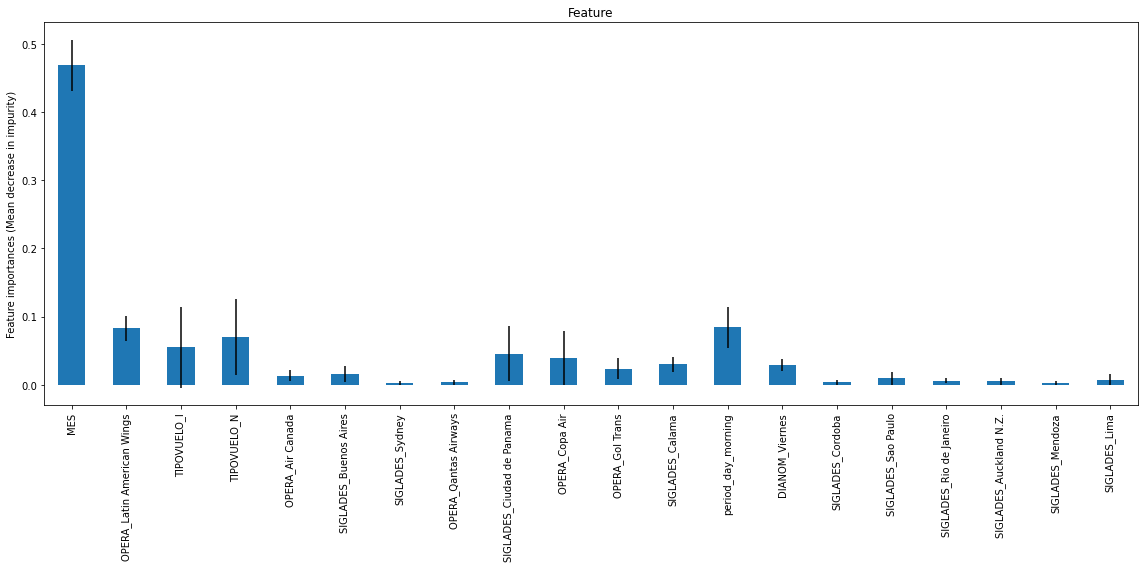

In [82]:
fig, ax = plt.subplots(figsize = (16,8))
mordel_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature')
ax.set_ylabel('Feature importances (Mean decrease in impurity)')
fig.tight_layout()

### How could you improve the Performance?

Some ideas to how to improve model Performance:
- Choosing more variables to fit in the model
- Testing other hyperparameters values and test in each model
- Test e evaluate more models
- The proportion of Delay Rate in the dataset 0 (60%) and 1 (20%) looks like an unbalanced characteristic. SMOTE was used, but maybe it's worth to test other (or better) ways to apply
- Add more features - for example: weather, natural disaster, war

## Some References

Just some ones that I reminded to save.

How to Implement Decision Trees in Python (Train, Test, Evaluate, Explain) \
https://www.youtube.com/watch?v=wxS5P7yDHRA&ab_channel=M%C4%B1sraTurp \
 \
RandomizedSearchCV to find Optimal Parameters in Python \
https://www.projectpro.io/recipes/find-optimal-parameters-using-randomizedsearchcv-for-regression#mcetoc_1g1isi137e \
 \
Machine Learning Tutorial : Decision Tree hyperparameter optimization \
https://www.youtube.com/watch?v=gRTUwkjIVUU&ab_channel=KunaalNaik \
 \
scikit-learn - Machine Learning in Python \
https://scikit-learn.org/stable/index.html \
 \
Random Forest Hyperparameter Tuning in Python \
https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/ \

Estatística para Seleção de Atributos \
https://medium.com/data-hackers/estat%C3%ADstica-para-sele%C3%A7%C3%A3o-de-atributos-81bdc274dd2c#:~:text=Teste%20do%20Chi%2DQuadrado&text=Quanto%20mais%20alto%20o%20Chi,feature_selection%20import%20chi2%20

Dados Desbalanceados — O que são e como lidar com eles \
https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b 

Feature importances with a forest of trees \
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html